# Homework - Regression

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

RANDOM_STATE = 42

In [2]:
default_df = pd.read_csv("./car_fuel_efficiency.csv")

In [3]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
base_train = ['engine_displacement', 'horsepower', 'vehicle_weight']
df = default_df.loc[:, base]

In [4]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


## EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

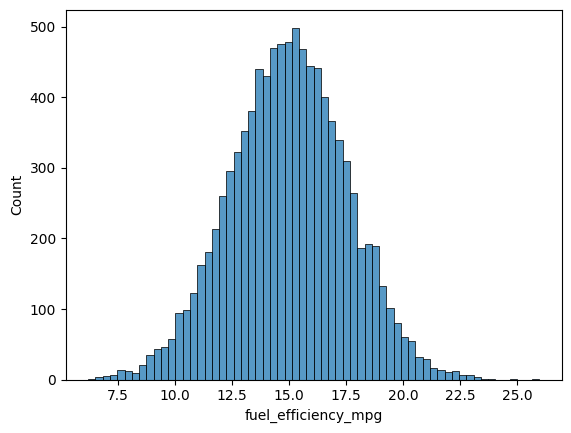

In [5]:
sns.histplot(data=df, x="fuel_efficiency_mpg")

## Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

### Answer

* `horsepower`

In [6]:
df.columns[df.isna().any()]

Index(['horsepower'], dtype='object')

## Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

### Answer

* 149

In [7]:
df['horsepower'].quantile(q=0.5)
df['horsepower'].median()

np.float64(149.0)

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.


In [8]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(RANDOM_STATE)
np.random.shuffle(idx)

X_train = df.iloc[idx[:n_train]]
X_val = df.iloc[idx[n_train:n_train+n_val]]
X_test = df.iloc[idx[n_train+n_val:]]

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# X_train_seed['vehicle_weight'] = X_train_seed['vehicle_weight']
# X_val_seed['vehicle_weight'] = X_val_seed['vehicle_weight']
# X_test_seed['vehicle_weight'] = X_test_seed['vehicle_weight']

y_train = X_train['fuel_efficiency_mpg'].values
y_val = X_val['fuel_efficiency_mpg'].values
y_test = X_test['fuel_efficiency_mpg'].values

del X_train['fuel_efficiency_mpg']
del X_val['fuel_efficiency_mpg']
del X_test['fuel_efficiency_mpg']

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- [x] With mean
- Both are equally good

In [9]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def prepare_X(df):
    df = df.copy()
    
    df["age"] = 2023 - (1900 + df['model_year'])
    features = ["engine_displacement", "horsepower", "vehicle_weight", "age"]

    # for v in [2, 3, 4]:
    #     df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
    #     features.append('num_doors_%d' % v)

    # for name, values in categorical.items():
    #     for value in values:
    #         df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
    #         features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Fill NaN with 0

In [10]:
df_train = X_train.copy()
df_val = X_val.copy()

In [11]:
for df in df_train, df_val:
    df['horsepower'] = df['horsepower'].fillna(0.0)

In [12]:
df_train = prepare_X(df_train)
w0, w = train_linear_regression(df_train, y_train)

df_val = prepare_X(df_val)
y_pred = w0 + df_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5173782641902114)

### Fill with mean

In [13]:
df_train = X_train.copy()
df_val = X_val.copy()

In [14]:
# for df in df_train, df_val:
df_train['horsepower'] = df_train['horsepower'].fillna(df_train['horsepower'].mean())
df_val['horsepower'] = df_val['horsepower'].fillna(df_train['horsepower'].mean())

In [15]:
df_train = prepare_X(df_train)
w0, w = train_linear_regression(df_train, y_train)

df_val = prepare_X(df_val)
y_pred = w0 + df_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4635965044319218)

In [16]:
X_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0 [x]
- 0.01
- 1
- 10
- 100


In [17]:
scores = {}

df_train = X_train.copy()
df_val = X_val.copy()

In [18]:
X_train.isna().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [19]:
df_train["horsepower"] = df_train["horsepower"].fillna(0)
df_val["horsepower"] = df_val["horsepower"].fillna(0)

In [20]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [21]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    df_train_r = prepare_X(df_train)
    w0, w = train_linear_regression_reg(df_train_r, y_train, r=r)

    df_val_r = prepare_X(df_val)
    y_pred_r = w0 + df_val_r.dot(w)
    score = rmse(y_val, y_pred_r)
    scores[r] = score
    
    print(r,score)

print("scores are", scores)
print("min rmse is", min(scores.values()))

0 0.5173782638840126
0.01 0.517116190209274
0.1 0.5188153776948363
1 0.5229927473526188
5 0.5238376971289379
10 0.5239543412891676
100 0.5240616581454115
scores are {0: np.float64(0.5173782638840126), 0.01: np.float64(0.517116190209274), 0.1: np.float64(0.5188153776948363), 1: np.float64(0.5229927473526188), 5: np.float64(0.5238376971289379), 10: np.float64(0.5239543412891676), 100: np.float64(0.5240616581454115)}
min rmse is 0.517116190209274


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001 [x]
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [28]:
def prepare_data_zero(df):
    df = df.fillna(0)
    X = df.values
    return X

datasets = {}
rmse_results = {}
df_5 = pd.read_csv('./car_fuel_efficiency.csv')
df_5 = df_5[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

for n in range(10):  # seeds 0 to 9
 
    
    # Split 60/20/20
    train_n = int(len(df_5)*0.6)
    val_n = int(len(df_5)*0.2)
    test_n = int(len(df_5)*0.2)
 
    x_train = df_5.iloc[:train_n]
    x_val = df_5.iloc[train_n: train_n +val_n]
    x_test = df_5.iloc[train_n + val_n:]

    # Shuffling indexes
    np.random.seed(n)
    idx = np.arange(len(df_5))
    np.random.shuffle(idx)

    # Extraction
    x_train = df_5.iloc[idx[:train_n]]
    x_val = df_5.iloc[idx[train_n: train_n +val_n]]
    x_test = df_5.iloc[idx[train_n + val_n:]]

    

    # Reset indexes
    x_train.reset_index(drop = True,inplace = True)
    x_val.reset_index(drop = True,inplace = True) 
    x_test.reset_index(drop = True,inplace = True)

    # Target   
    y_train = x_train.fuel_efficiency_mpg.values
    y_val = x_val.fuel_efficiency_mpg.values
    y_test = x_test.fuel_efficiency_mpg.values

    # Deleting the target from datasets
    del x_train["fuel_efficiency_mpg"]
    del x_val["fuel_efficiency_mpg"]
    del x_test["fuel_efficiency_mpg"] 

    # Prepare the data in filling zeros
    X_train = prepare_data_zero(x_train)
    X_val = prepare_data_zero(x_val)
    X_test = prepare_data_zero(x_test)


    # Savings in a versioned dictionary
    datasets[f"seed_{n}"] = {
        "x_train": x_train,
        "y_train": y_train,
        "x_val": x_val,
        "y_val": y_val,
        "x_test": x_test,
        "y_test": y_test
    }

    # Training linear regression without regularization
    w0 , w = train_linear_regression(X_train,y_train)

    # Prediction on validation set with trained model
    y_pred = w0 + X_val.dot(w)

    # Evaluating with RMSE
    score = round(rmse(y_val,y_pred),3)

    # Storage of RMSE
    rmse_results[f"seed_{n}"] = score

print("RMSE par seed :")
for seed, score in rmse_results.items():
    print(f"{seed}: {score}")

RMSE par seed :
seed_0: 0.521
seed_1: 0.522
seed_2: 0.523
seed_3: 0.516
seed_4: 0.511
seed_5: 0.529
seed_6: 0.532
seed_7: 0.51
seed_8: 0.515
seed_9: 0.513


In [29]:
df_5 = pd.read_csv('./car_fuel_efficiency.csv')
columns_5 = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_5 = df_5[columns_5]
random_seed_scores = []
for random_seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df_5)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    np.random.seed(random_seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    X_train_seed = df_5.iloc[idx[:n_train]]
    X_val_seed = df_5.iloc[idx[n_train:n_train+n_val]]
    X_test_seed = df_5.iloc[idx[n_train+n_val:]]

    X_train_seed = X_train_seed.reset_index(drop=True)
    X_val_seed = X_val_seed.reset_index(drop=True)
    X_test_seed = X_test_seed.reset_index(drop=True)

    y_train_seed = X_train_seed['fuel_efficiency_mpg'].values
    y_val_seed = X_val_seed['fuel_efficiency_mpg'].values
    y_test_seed = X_test_seed['fuel_efficiency_mpg'].values

    del X_train_seed['fuel_efficiency_mpg']
    del X_val_seed['fuel_efficiency_mpg']
    del X_test_seed['fuel_efficiency_mpg']

    # for df in X_train_seed, X_val_seed, X_test_seed:
    #     df = df.fillna(0)
    X_train_seed.fillna(0, inplace=True)
    X_val_seed.fillna(0, inplace=True)
    X_test_seed.fillna(0, inplace=True)

    # df_train_seed = prepare_X(X_train_seed)
    w0, w = train_linear_regression(X_train_seed, y_train_seed)

    # df_val_seed = prepare_X(X_val_seed)
    y_pred_seed = w0 + X_val_seed.dot(w)
    score = rmse(y_val_seed, y_pred_seed)
    print(random_seed, score)
    random_seed_scores.append(score)
    

print("STD for random states is ", np.array(random_seed_scores).std())

0 0.5206531296283238
1 0.5213388913284781
2 0.5228069974406357
3 0.515951674060754
4 0.5109129462350962
5 0.5283406457668103
6 0.5313910657697322
7 0.5090670387068978
8 0.5147399128777621
9 0.5131865907680679
STD for random states is  0.00698944637387572


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515 [x]
- 5.15
- 51.5

In [23]:
df_6 = pd.read_csv('./car_fuel_efficiency.csv')
columns_6 = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_6 = df_6[columns_6]
random_seed_scores = []
n = len(df_6)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

X_train_seed = df_6.iloc[idx[:n_train]]
X_val_seed = df_6.iloc[idx[n_train:n_train+n_val]]
X_test_seed = df_6.iloc[idx[n_train+n_val:]]

X_train_seed = X_train_seed.reset_index(drop=True)
X_val_seed = X_val_seed.reset_index(drop=True)
X_test_seed = X_test_seed.reset_index(drop=True)

y_train_seed = X_train_seed['fuel_efficiency_mpg'].values
y_val_seed = X_val_seed['fuel_efficiency_mpg'].values
y_test_seed = X_test_seed['fuel_efficiency_mpg'].values

del X_train_seed['fuel_efficiency_mpg']
del X_val_seed['fuel_efficiency_mpg']
del X_test_seed['fuel_efficiency_mpg']

for df in X_train_seed, X_val_seed, X_test_seed:
    df['horsepower'] = df['horsepower'].fillna(0)

X_full = pd.concat([X_train_seed, X_val_seed])
X_full = X_full.reset_index(drop=True)
y_full = np.concatenate([y_train_seed, y_val_seed])

X_full_train = prepare_X(X_full)
w0, w = train_linear_regression_reg(X_full_train, y_full, 0.001)

df_test_seed = prepare_X(X_test_seed)
y_pred_seed = w0 + df_test_seed.dot(w)
score = rmse(y_test_seed, y_pred_seed)
    
print("RSME is ", score)

RSME is  0.5156253011746859
